# Online Shopping Data Analysis

Author: __Natania Nguyen__

Course Project, UC Irvine, Math 10, Summer 2023

## Introduction

In this project, I will be analyzing a dataset on "Online Shopper Intentions". 

## Imports & Extra Functions

This section is for all imports I will use for the rest of the project in order to keep things organized.

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import calendar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def style_negative(v, props=''):
    return props if v < 0 else None

## Setting Up & Cleaning Up the Data

In the first section of my final project, I will be setting up the data and prepping it to be used for analysis.

In [2]:
df_pre = pd.read_csv("online_shoppers_intention.csv")
df_pre.isnull().values.any()
df_pre

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


This will read the csv file and convert it to a pandas dataframe. The `df_pre.isnull().values.any()` checks if there are any missing values in the dataframe. Luckily, this dataframe has no missing values.

In [3]:
df = df_pre[["Month", "Weekend", "SpecialDay", "Revenue", "VisitorType"]]
df = df[df["Revenue"]== True]

This code will give us a subset of `df_pre` that only include the columns with the following information:
* The month in which the user visited the shop site
* A number between 0 & 1, indicating how close to a holiday the user visited the shop site
* What type of visitor the user was: new or returning
* Whether or not the user visited the sight on a weekend
* Whether or not the visit ended with the user purchasing an item
__These will be the only columns relevant to the project.__

In order to keep the dataframe under Altair's maximum __5000__ row limit, we will only be looking at the cases in which the user's visit ended with them making a purchase.

In [4]:
def month_to_int(s):
    return [
        'Jan',
        'Feb',
        'Mar',
        'Apr',
        'May',
        'June',
        'Jul',
        'Aug',
        'Sep',
        'Oct',
        'Nov',
        'Dec',
    ].index(s) + 1

In [5]:
df["month_int"] = pd.DataFrame(df["Month"].map(month_to_int))
df.sort_values(by=['month_int'],inplace=True)

The function above takes the `"Month"` column and converts it to the month's numerical value. Using this function, we will create a new column, `"month-int"` to sort the dataframe by. This is because the original dataframe is not sorted in chronilogical order. 

In [6]:
df.rename(columns = {"SpecialDay":"Holiday", "VisitorType": "Visitor Type", "Revenue": "Purchase"}, inplace=True)

I will also be changing a few of the column names to make them more legable and simple.

## A Quick Analysis

Let's take a quick look at the data. 

In [7]:
df

,Month,Weekend,Holiday,Purchase,Visitor Type,month_int
65,Feb,False,0.8,True,Returning_Visitor,2
76,Feb,False,0.0,True,Returning_Visitor,2
101,Feb,True,1.0,True,Returning_Visitor,2
1511,Mar,True,0.0,True,New_Visitor,3
1512,Mar,False,0.0,True,Returning_Visitor,3
...,...,...,...,...,...,...
8993,Dec,False,0.0,True,Returning_Visitor,12
8990,Dec,False,0.0,True,New_Visitor,12
10191,Dec,False,0.0,True,New_Visitor,12
8251,Dec,False,0.0,True,New_Visitor,12


At a glance, we can see that the month of February only has 3 purchases (at least in this dataset). Taking into account these rows’ `“Holiday”` values, we can see 2 out of 3 of these purchases were made very close to a holiday, most likely Valentine’s Day, as they have values `0.8` and `1`. 

We can also tell that at the top of the `”Visitor Type”` column, that about 77% of the purchases were made by returning visitors, but we will get a closer look at that later.

## Charting the Data (Part 1)

Next, we will chart the data. I have chosen a bar graph with the month on the x-axis and the count of purchases for each month on the y-axis. In order to make the bars more visible, they have been set to contrasting colors.

In [8]:
c1 = alt.Chart(df).mark_bar().encode(
    x = alt.X("Month", sort = 
        ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']),
    y = alt.Y("count()", title="Number of Purchases"),
    color = "Month:N",
    tooltip = ["Month", alt.Y("count()", title="Number of Purchases")],
    order="month_int"
    ).properties(
    title = "Purchases Made Each Month"
)

c2 = alt.Chart(df).mark_line(point=True).encode(
    x= alt.X("month_int", title= "Month (Numerical Value)"),
    y=alt.Y("count()", title="Number of Purchases"),
    tooltip=["Month", alt.Y("count()", title="Number of Purchases")]
).properties(
    title = "Purchases Over the Year"
)

c1 & c2

alt.VConcatChart(...)

### Analyzing the Data (Part 1)

As you can see, there is a clear spike in purchases in November, as well as May. This is most likely due to the fact that November would be right around the time people would be shopping for Christmas presents, not to mention Black Fiday sales! As for May, this could be for Mother's Day or even upcoming graduations. 

I have added points to the line chart in order to make it more clear the numbers are totals of every month and that the lines in between are only for the sake of visually representing the trend of purchases over the year. The points are also useful for where users should hover over to see the exact point value.

### Extra Chart

Let's look at the data set in regards to closeness to a holiday, but first, let's read a bit about the values for our `"Holiday"` column.

*"The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentin[e]’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8." (Sakar, Kastro; UCI Machine Learning Repository)*



In [9]:
extra_c = alt.Chart(df).mark_circle(size=100).encode(
    x="month_int",
    y="Holiday",
    color = "month_int",
    tooltip = ["Month", "Holiday"]
)

extra_c

alt.Chart(...)

Looking at this chart, we are unable to confirm if this is true of November, but definitely true for May. As you can see, there are a lot of cases where the user purchased an item around the time of a holiday (it is safe to assume that the holiday was Mother's Day.)

## Charting the Data (Part 2)

Let's chart the dataframe using different parts of the data this time. Now we will take a look at the possible relationship between weekends and months. First, let's make a new dataframe.

In [10]:
df_2 = df[df["Weekend"]==True]
df_3 = df[df["Weekend"]==False]

These new sub-dataframes are going to give us the following:
* A dataset of purchases made on weekdays
* A dataset of purchases made on weekends

In [11]:
c3 = alt.Chart(df_2).mark_bar().encode(
    x = alt.X("Month", sort = 
        ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']),
    y = alt.Y("count()", title="Number of Purchases made on a Weekend", 
        scale=alt.Scale(domain=[0, 550])),
    color = "Month:N",
    tooltip = ["Month", alt.Y("count()", title="Number of Purchases")],
    order="month_int"
    ).properties(
    title = "Purchases Made Each Month on a Weekend",
)

c4 = alt.Chart(df_3).mark_bar().encode(
    x = alt.X("Month", sort = 
        ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']),
    y = alt.Y("count()", title="Number of Purchases made on a Weekend"),
    color = "Month:N",
    tooltip = ["Month", alt.Y("count()", title="Number of Purchases")],
    order="month_int"
    ).properties(
    title = "Purchases Made Each Month on a Weekday"
)

c3 | c4

alt.HConcatChart(...)

### Analyzing the Data (Part 2)

__NOTE:__ I've scaled the graphs to have the same y-axis maximums in order for us to compare them more easily.

You can see that it is more likely for a shopper to make a purchase on a weekday. This is actually the opposite of what I thought I would see, but after consulting with friends, they made the case that on the weekends people will be more likely to go out and do activities other than online shopping. __ALTHOUGH,__ this is mere speculation since I feel there might not be any coorelation between day of the week and shopper intention. It very well could be that it is more likely that one purchases on a weekday since there are more weekdays than weekends.

## Charting the Data (Part 3)

Here we will look at a different type of chart using seaborn. This chart will focus on new visitors to the website, whether they purchased or not. 

So let's make a new dataframe.

In [12]:
df_4 = df_pre[["ProductRelated_Duration", "Administrative_Duration", "VisitorType", "Month"]]


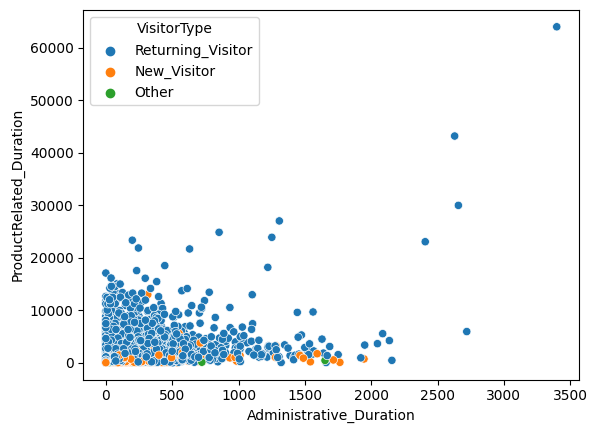

In [13]:
c5 = sns.scatterplot(
    data=df_4,
    x="Administrative_Duration",
    y="ProductRelated_Duration",
    hue="VisitorType"
)

### Analyzing the Data (Part 3)

Looking at this graph, there is a roughly proportional relationship between the two duration times. The more time the user spends on the product related pages, the less time on the administrative and vice versa.

## Logistical Regression

Now let's use this data to train a logistical regression model to see if it can predict whether a user is a returning or new visitor based off their product related page duration time and their administrative page duration time.

In [14]:
df_5 = df_pre[["ProductRelated_Duration", "Administrative_Duration", "VisitorType", "Month"]].head(2000)
clf = LogisticRegression()
cols = ["Administrative_Duration", "ProductRelated_Duration"]
clf.fit(df_5[cols], df_5["VisitorType"])
df_5["pred"] = clf.predict(df_5[cols])
df_5.shape

NameError: name 'LogisticRegression' is not defined

In [ ]:
clf.predict_proba(df_4.loc[[23, 24, 25],cols])

array([[0.18242349, 0.01010543, 0.80747108],
       [0.18360372, 0.01018051, 0.80621577],
       [0.17161009, 0.00942158, 0.81896833]])

In [ ]:
c6 = alt.Chart(df_5).mark_point(filled=True,size=100).encode(
    x=alt.X(cols[0]),
    y=alt.Y(cols[1]),
    color="pred",
    shape="pred",
    tooltip=["VisitorType","pred"]
).properties(title="New or Returning Prediction")
c6 

alt.Chart(...)

Unfortunately, our training data was not that great and therefore, the predictions are extremely off, as you can see when we call `clf.predict_proba`. This shows that the logistical regression's predictions are likely inaccurate, which is made clear when you look at the graph. 

## Summary

In summary, I think we were able to come to the following conclusions:
* This site gets the most traffic during May and November.
* Whether or not a holiday is coming up soon may have an affect on whether the user makes a purchase.
* There is no correlation between what day of the week it is and whether a user with purchase something from the site.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

I found this dataset off the UCI Machine Learning Repository.

* List any other references that you found helpful.

Pandas Table Visualization (style) 

Encodings in Altair 

Customizing Visualizations in Altair

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=49362253-eab1-4cfb-8ac2-60f3f1c9b2fa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>